## Basic Image Handling and Processing

In [1]:
# PIL — The Python Imaging Library
from PIL import Image
import os

In [22]:
pil_im = Image.open('empire.jpg')
# pil_im is a PIL image object
# pil_im.show()

pil_im_bw = pil_im.convert('L')

pil_im_bw.thumbnail((128,128))
# this makes pil_im_bw the thumbnail
pil_im_bw.save("new.png")

box = (300,300,400,400)
region = pil_im.crop(box)

region = region.transpose(Image.ROTATE_180)
pil_im.paste(region, box)

out = pil_im.resize((256,256))
out = pil_im.rotate(45)

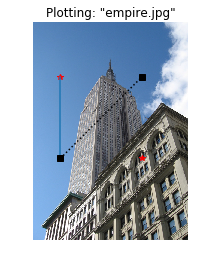

In [41]:
from pylab import *

# read image to array
im = array(Image.open('empire.jpg'))

# plot the img
imshow(im)

# some points
x = [100,100,400,400]
y = [200,500,200,500]

# plot the points with red star-markers
plot(x,y,'r*')

# line plot connecting the first two points
plot(x[:2], y[:2])

plot(x[1:3],y[1:3],'ks:')

# add title and show the plot
title('Plotting: "empire.jpg"')
axis('off')
show()

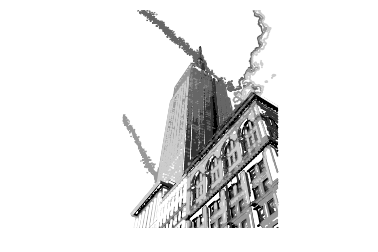

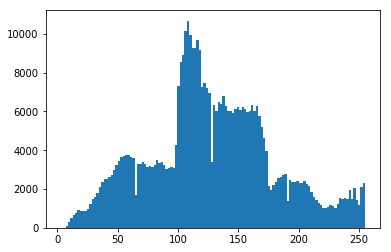

In [50]:
# read image to array
im = array(Image.open('empire.jpg').convert('L'))

# create a new figure
figure()
# don't use colors
gray()
# show contours with origin upper left corner
contour(im, origin='image')
axis('equal')
axis('off')

figure()
hist(im.flatten(),128)
show()

Please click 3 points


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


you clicked: []


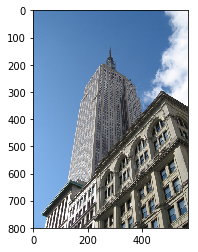

In [54]:
im = array(Image.open('empire.jpg'))
imshow(im)
print('Please click 3 points')
x = ginput(3)
print('you clicked:',x)
show()

(800, 569, 3) uint8
(800, 569) float32


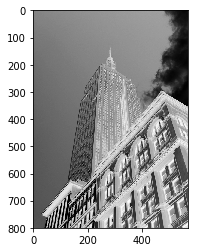

In [61]:
im = array(Image.open('empire.jpg'))
print(im.shape, im.dtype)

im = array(Image.open('empire.jpg').convert('L'),'f')
print(im.shape, im.dtype)

im2 = 255 - im # invert image
imshow(im2)

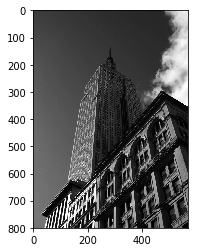

In [63]:
# im3 = (100.0/255) * im + 100
im3 = 255.0 * (im/255.0)**2 # squared
imshow(im3)

In [67]:
def histeq(im,nbr_bins=256):
    #  """  Histogram equalization of a grayscale image. """
    # get image histogram
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function 
    cdf = 255 * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values
    im2 = interp(im.flatten(),bins[:-1],cdf)

    return im2.reshape(im.shape), cdf

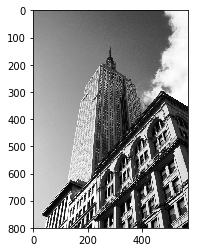

In [70]:
from numpy import *

im = array(Image.open('empire.jpg').convert('L'))
im2,cdf = histeq(im)
imshow(im2)

In [ ]:
def compute_average(imlist):
    # compute the average of a list of images
    
    averageim = array(Image.open(imlist[0]),'f')
    
    for imname in imlist[1:]:
        try:
            averageim += array(Image.open(imname))
        except:
            print imname + '... skipped'
    averageim /= len(imlist)

    # return average as uint8
    return array(averageim,'uint8')

